In [111]:
import numpy as np
import pandas as pd 
import nltk 
import string

In [112]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 800)
df = pd.read_csv('subset_headlines.csv', parse_dates=['scraped_at'])
df[['headline_1_title', 'headline_1_url']] = df['headline_1'].str.split('https://', n=1, expand=True)
df[['headline_2_title', 'headline_2_url']] = df['headline_2'].str.split('https://', n=1, expand=True)
df[['headline_3_title', 'headline_3_url']] = df['headline_3'].str.split('https://', n=1, expand=True)

df.drop(['headline_1', 'headline_2', 'headline_3'], axis=1, inplace=True)
print(df.head())

                          org                 scraped_at                                   headline_1_title                                     headline_1_url                                   headline_2_title                                     headline_2_url                                   headline_3_title                                     headline_3_url
0   https://www.economist.com 2024-11-28 05:39:57.350818                Elon Musk’s xAI goes after OpenAI,   www.economist.com/business/2024/11/27/elon-mus...  Does Donald Trump have unlimited authority to ...  www.economist.com/united-states/2024/11/27/doe...                 Peace in Lebanon is just a start,   www.economist.com/leaders/2024/11/27/peace-in-...
1  https://www.lemonde.fr/en/ 2024-11-28 05:39:55.247174  With her latest production, French theater gia...  www.lemonde.fr/en/culture/article/2024/11/28/w...  Tens of thousands in Lebanon head home as Isra...  www.lemonde.fr/en/international/article/2024/1...  Biden admini

In [113]:
for i in ['headline_1_url', 'headline_2_url', 'headline_3_url']:
    df[i] = 'https://' + df[i].astype(str)
melted = pd.melt(df, id_vars=['org', 'scraped_at'], value_vars=['headline_1_title', 'headline_2_title', 'headline_3_title'], var_name='headline_type', value_name='headline')
print(df.shape)
print(melted.shape)

(100, 8)
(300, 4)


In [114]:
melted_urls = pd.melt(df, id_vars=['org', 'scraped_at'], value_vars=['headline_1_url', 'headline_2_url', 'headline_3_url'], var_name='headline_url', value_name='url')
melted['url'] = melted_urls['url']
final_df = melted[['headline', 'url', 'org', 'scraped_at', 'headline_type']]
final_df['headline_type'] = final_df['headline_type'].str.extract(r'headline_(\d+)_title')

print(final_df.head(20))
print(final_df.shape)

                                             headline                                                url                         org                 scraped_at headline_type
0                 Elon Musk’s xAI goes after OpenAI,   https://www.economist.com/business/2024/11/27/...   https://www.economist.com 2024-11-28 05:39:57.350818             1
1   With her latest production, French theater gia...  https://www.lemonde.fr/en/culture/article/2024...  https://www.lemonde.fr/en/ 2024-11-28 05:39:55.247174             1
2   Air raid alert across Ukraine as multiple expl...     https://www.bbc.com/news/articles/cwy15lp21l3o         https://www.bbc.com 2024-11-28 05:39:54.460652             1
3   ‘Absolutely terrifying’: Israel pounds north G...  https://www.aljazeera.com/news/liveblog/2024/1...   https://www.aljazeera.com 2024-11-28 05:39:53.667695             1
4     Trump wastes no time in reigniting trade wars,   https://www.economist.com/finance-and-economic...   https://www.economist.c

In [115]:
# final_df['org'] = final_df['org'].str.extract(r'https?:\/\/(?:www\.)?([a-zA-Z0-9-]+)')
# print(final_df.head(5))
# final_df.to_dict('records')

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def remove_punct(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    print(no_punct)
    return no_punct

def remove_stopwords(text):
    words = word_tokenize(text)
    without_stopwords = " ".join([w for w in words if w not in stopwords.words('english')])
    print(without_stopwords)
    return without_stopwords

final_df['headline'] = final_df['headline'].apply(lambda x: remove_punct(x))
final_df['headline'] = final_df['headline'].apply(lambda x: remove_stopwords(x))
print(final_df.head(5))

[nltk_data] Downloading package stopwords to /home/rtseng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rtseng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            headline                                                url                         org                 scraped_at headline_type
0                        Elon Musk ’ xAI goes OpenAI  https://www.economist.com/business/2024/11/27/...   https://www.economist.com 2024-11-28 05:39:57.350818             1
1  With latest production French theater giant Ar...  https://www.lemonde.fr/en/culture/article/2024...  https://www.lemonde.fr/en/ 2024-11-28 05:39:55.247174             1
2  Air raid alert across Ukraine multiple explosi...     https://www.bbc.com/news/articles/cwy15lp21l3o         https://www.bbc.com 2024-11-28 05:39:54.460652             1
3  ‘ Absolutely terrifying ’ Israel pounds north ...  https://www.aljazeera.com/news/liveblog/2024/1...   https://www.aljazeera.com 2024-11-28 05:39:53.667695             1
4            Trump wastes time reigniting trade wars  https://www.economist.com/finance-and-economic...   https://www.economist.com 202

In [117]:
from collections import Counter

all_headlines = ''.join(final_df['headline'])     
words_counts = Counter(all_headlines.split(' '))
most_common_words = words_counts.most_common(20)
print(most_common_words)

[('’', 70), ('Trump', 43), ('Gaza', 24), ('Ukraine', 21), ('US', 20), ('Israel', 19), ('Lebanon', 16), ('says', 14), ('‘', 13), ('Donald', 13), ('Harris', 13), ('ceasefire', 11), ('election', 11), ('Hezbollah', 10), ('war', 9), ('new', 9), ('Musk', 8), ('truce', 7), ('Gaetz', 7), ('attacks', 7)]


In [118]:
most_common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
most_common_words_df.drop(8, inplace=True)
most_common_words_df.drop(0, inplace=True)

print(most_common_words_df)


         word  count
1       Trump     43
2        Gaza     24
3     Ukraine     21
4          US     20
5      Israel     19
6     Lebanon     16
7        says     14
9      Donald     13
10     Harris     13
11  ceasefire     11
12   election     11
13  Hezbollah     10
14        war      9
15        new      9
16       Musk      8
17      truce      7
18      Gaetz      7
19    attacks      7


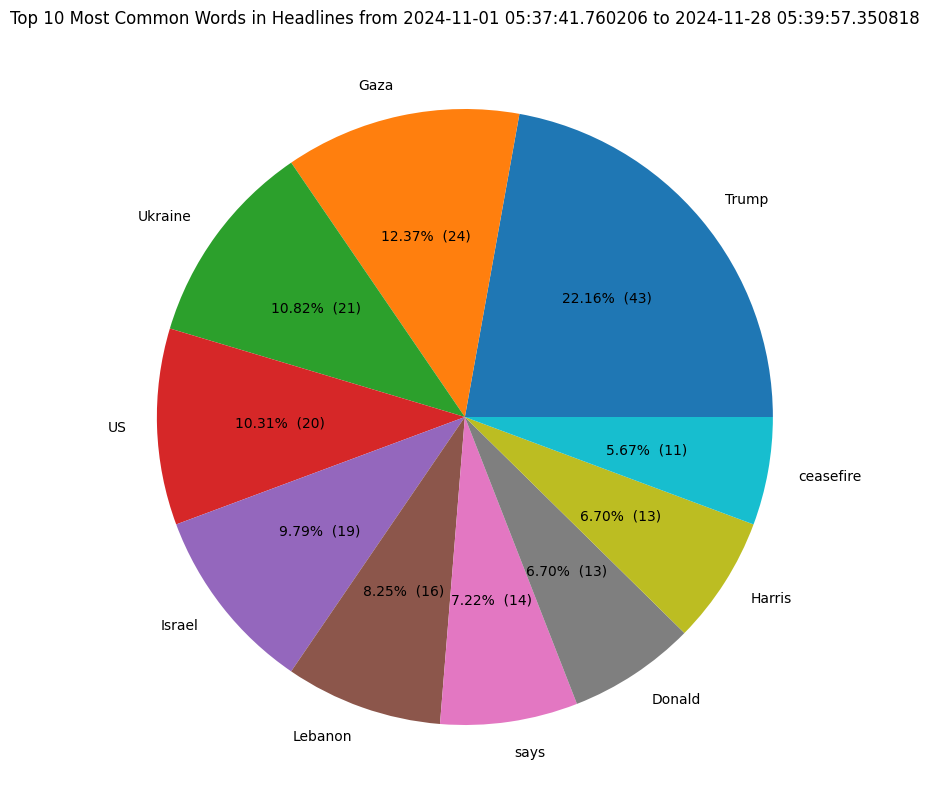

In [119]:
import matplotlib
top_ten = most_common_words_df.head(10)

def add_count(values):
    def add_count_(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return add_count_
pie = top_ten.plot.pie(labels=most_common_words_df['word'], y='count', autopct=add_count(top_ten['count']), figsize=(10, 10))
pie.get_legend().remove()
pie.set_ylabel('')
pie.set_title(f'Top 10 Most Common Words in Headlines from {final_df['scraped_at'].min()} to {final_df['scraped_at'].max()}')

pie.figure.savefig(f'top_10_words_{final_df['scraped_at'].min()}.png')



In [141]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])
print(original_df.dtypes)
filtered_june = original_df.loc[(original_df['scraped_at'] >= '2024-06-01') & (original_df['scraped_at'] <= '2024-07-01')]

def transform_dataframe(df):
    df[['headline_1_title', 'headline_1_url']] = df['headline_1'].str.split('https://', n=1, expand=True)
    df[['headline_2_title', 'headline_2_url']] = df['headline_2'].str.split('https://', n=1, expand=True)
    df[['headline_3_title', 'headline_3_url']] = df['headline_3'].str.split('https://', n=1, expand=True)
    df.drop(['headline_1', 'headline_2', 'headline_3'], axis=1, inplace=True)
    for i in ['headline_1_url', 'headline_2_url', 'headline_3_url']:
        df[i] = 'https://' + df[i].astype(str)
    melted = pd.melt(df, id_vars=['org', 'scraped_at'], value_vars=['headline_1_title', 'headline_2_title', 'headline_3_title'], var_name='headline_type', value_name='headline')
    melted_urls = pd.melt(df, id_vars=['org', 'scraped_at'], value_vars=['headline_1_url', 'headline_2_url', 'headline_3_url'], var_name='headline_url', value_name='url')
    melted['url'] = melted_urls['url']
    final_df = melted[['headline', 'url', 'org', 'scraped_at', 'headline_type']]
    final_df['headline_type'] = final_df['headline_type'].str.extract(r'headline_(\d+)_title')
    return final_df

def clean_data(df):
    df['headline'] = df['headline'].apply(lambda x: remove_punct(x))
    df['headline'] = df['headline'].apply(lambda x: remove_stopwords(x))
    return df

def get_most_common_words(df):
    all_headlines = ''.join(df['headline'])     
    words_counts = Counter(word_tokenize(all_headlines))
    print(words_counts)
    most_common_words = words_counts.most_common(20)
    most_common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
    return most_common_words_df

def main(df):
    df = transform_dataframe(df)
    df = clean_data(df)
    df = get_most_common_words(df)
    df = df[df['word'] != "'"]
    print(df)

main(filtered_june)

org                   object
scraped_at    datetime64[ns]
headline_1            object
headline_2            object
headline_3            object
dtype: object
Counter({'’': 43, 'Gaza': 17, '‘': 11, 'Assange': 9, 'election': 9, 'US': 8, 'Israeli': 7, 'plea': 7, 'French': 6, 'deal': 6, 'Israel': 6, 'elections': 6, 'India': 6, 'Africa': 6, 'new': 6, 'killed': 5, 'strikes': 5, 'kills': 5, 'hard': 5, 'says': 5, 'war': 5, 'right': 5, 'Ukraine': 5, 'China': 5, 'Modi': 5, 'The': 4, 'attacks': 4, 'Julian': 4, 'freed': 4, 'attack': 4, 'economic': 4, 'end': 4, 'far': 4, 'UN': 4, 'win': 4, 'ceasefire': 4, 'Russian': 4, 'first': 4, 'UK': 4, 'military': 4, 'BJP': 4, 'A': 3, 'increasingly': 3, 'free': 3, 'world': 3, 'France': 3, 'Indian': 3, 'school': 3, 'opposition': 3, 'plan': 3, 'Mexico': 3, 'political': 3, 'coup': 3, 'could': 3, 'final': 3, 'ANC': 3, 'rise': 2, 'civilian': 2, 'Labour': 2, 'make': 2, 'journalists': 2, 'people': 2, 'three': 2, 'fighting': 2, 'near': 2, 'AI': 2, 'among': 2, 'Israels

/tmp/user/1001/ipykernel_82642/1347556843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['headline_1_title', 'headline_1_url']] = df['headline_1'].str.split('https://', n=1, expand=True)
/tmp/user/1001/ipykernel_82642/1347556843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['headline_1_title', 'headline_1_url']] = df['headline_1'].str.split('https://', n=1, expand=True)
/tmp/user/1001/ipykernel_82642/1347556843.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic